<a href="https://colab.research.google.com/github/hayat415/repo/blob/main/creditCArFraud%20detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras import models
from keras import layers
import zipfile 


In [6]:
from google.colab import files
uploaded=files.upload()

Saving creditcard.csv to creditcard.csv


In [9]:
import pandas as pd
import io
data=pd.read_csv(io.BytesIO(uploaded['creditcard.csv']))

In [10]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [11]:
non_fraud=data[data["Class"]==0]
fraud = data[data["Class"]==1]
non_fraud.shape, fraud.shape

((284315, 31), (492, 31))

In [12]:
non_fraud=non_fraud.sample(fraud.shape[0])
non_fraud.shape

(492, 31)

In [13]:
data = fraud.append(non_fraud, ignore_index=True)
data.shape
data["Class"].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [14]:
x_data= data.drop(columns=["Class", "Time"], axis=0)
label = data["Class"]

In [15]:
x_data = data.sample(frac=1) # Shuffling the data
train_data_full= x_data.iloc[:689,:]
test_data_full = x_data.iloc[689:, :]
train_data = train_data_full.iloc[:, :-1]
train_labels = train_data_full.iloc[:, -1]
test_data = test_data_full.iloc[:, :-1]
test_labels = test_data_full.iloc[:, -1]

In [16]:
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

(689, 30)
(295, 30)
(689,)
(295,)


In [18]:
mean=train_data.mean(axis=0)
std=train_data.std(axis=0)
train_data = (train_data-mean)/std
test_data = (test_data-mean)/std

In [19]:
train_labels=np.asarray(train_labels).astype(dtype="float64")
test_labels=np.asarray(test_labels).astype(dtype="float64")

In [20]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [21]:
history=model.fit(train_data, train_labels, epochs=40, validation_split=.2)

Epoch 1/40
18/18 [==============================] - 1s 19ms/step - loss: 0.8357 - accuracy: 0.5563 - val_loss: 0.7805 - val_accuracy: 0.6957
Epoch 2/40
18/18 [==============================] - 0s 3ms/step - loss: 0.7830 - accuracy: 0.7754 - val_loss: 0.7295 - val_accuracy: 0.7899
Epoch 3/40
18/18 [==============================] - 0s 4ms/step - loss: 0.7284 - accuracy: 0.8359 - val_loss: 0.6788 - val_accuracy: 0.8478
Epoch 4/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6635 - accuracy: 0.8798 - val_loss: 0.6287 - val_accuracy: 0.8551
Epoch 5/40
18/18 [==============================] - 0s 4ms/step - loss: 0.6054 - accuracy: 0.9055 - val_loss: 0.5847 - val_accuracy: 0.8768
Epoch 6/40
18/18 [==============================] - 0s 4ms/step - loss: 0.5670 - accuracy: 0.9120 - val_loss: 0.5451 - val_accuracy: 0.8768
Epoch 7/40
18/18 [==============================] - 0s 4ms/step - loss: 0.5079 - accuracy: 0.9261 - val_loss: 0.5081 - val_accuracy: 0.8768
Epoch 8/40
18/18 [=

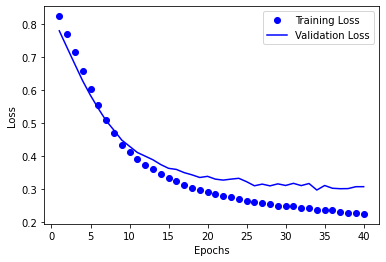

In [22]:
loss=history.history["loss"]
val_loss=history.history["val_loss"]
epochs=range(1, len(loss)+1)
plt.plot(epochs, loss, "bo", label="Training Loss")
plt.plot(epochs, val_loss, "b", label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

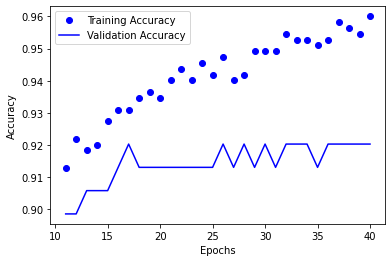

In [23]:
acc=history.history["accuracy"]
val_acc=history.history["val_accuracy"]
epochs=range(1, len(acc)+1)
plt.plot(epochs[10:], acc[10:], "bo", label="Training Accuracy")
plt.plot(epochs[10:], val_acc[10:], "b", label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [24]:
from keras import regularizers
model= models.Sequential()
model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu", input_shape=(train_data.shape[1],)))

model.add(layers.Dense(10, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(8,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(6,kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation="relu"))

model.add(layers.Dense(1,activation="sigmoid"))

model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [25]:
model.fit(train_data, train_labels, epochs=40)

Epoch 1/40
22/22 [==============================] - 1s 1ms/step - loss: 0.8272 - accuracy: 0.6634
Epoch 2/40
22/22 [==============================] - 0s 1ms/step - loss: 0.7374 - accuracy: 0.7871
Epoch 3/40
22/22 [==============================] - 0s 1ms/step - loss: 0.6889 - accuracy: 0.8259
Epoch 4/40
22/22 [==============================] - 0s 1ms/step - loss: 0.6472 - accuracy: 0.8739
Epoch 5/40
22/22 [==============================] - 0s 1ms/step - loss: 0.6176 - accuracy: 0.8707
Epoch 6/40
22/22 [==============================] - 0s 1ms/step - loss: 0.5838 - accuracy: 0.8934
Epoch 7/40
22/22 [==============================] - 0s 1ms/step - loss: 0.5535 - accuracy: 0.8962
Epoch 8/40
22/22 [==============================] - 0s 1ms/step - loss: 0.5044 - accuracy: 0.9215
Epoch 9/40
22/22 [==============================] - 0s 1ms/step - loss: 0.4584 - accuracy: 0.9353
Epoch 10/40
22/22 [==============================] - 0s 1ms/step - loss: 0.4411 - accuracy: 0.9132
Epoch 11/40
22/22 [

In [26]:
test_loss_score, test_acc_score=model.evaluate(test_data, test_labels)

10/10 [==============================] - 0s 2ms/step - loss: 0.2585 - accuracy: 0.9390


In [27]:
test_acc_score *100

93.89830231666565

In [28]:
prediction=model.predict(test_data)
pred_norm =np.where(prediction>.5, 1, 0)

pred_norm[:10].T

array([[0, 1, 0, 1, 1, 0, 0, 1, 1, 0]])

In [29]:
prediction[:10].T

array([[0.23149341, 1.        , 0.03633705, 0.9999994 , 0.999912  ,
        0.01494673, 0.03918424, 0.999974  , 0.99991506, 0.0108698 ]],
      dtype=float32)

In [30]:
test_labels[:].astype(dtype="int")

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0])

In [31]:
pred_check =pred_norm[:].T.astype(dtype="int")

In [32]:
c = pred_check.size

In [33]:
comapre_pred_test = test_labels == pred_check

In [34]:
a = comapre_pred_test[comapre_pred_test[:]== False].size

In [35]:
b = comapre_pred_test[comapre_pred_test[:]==True].size

In [36]:
print("Incorrect Predictions are:", a, "and Correct predictions are :", b, " the percentage is:", round((b/c)*100,2), "%"  )

Incorrect Predictions are: 18 and Correct predictions are : 277  the percentage is: 93.9 %
